## Tải dữ liệu

In [1]:
!wget https://raw.githubusercontent.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [96]:
df = pd.read_csv('marks.txt')

In [97]:
df

,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0
...,...,...,...
94,83.489163,48.380286,1
95,42.261701,87.103851,1
96,99.315009,68.775409,1
97,55.340018,64.931938,1


## Tách Features và Nhãn

In [98]:
X = df.iloc[:, :-1]

In [99]:
Y = df.iloc[:, -1]

Hiển thị dữ liệu

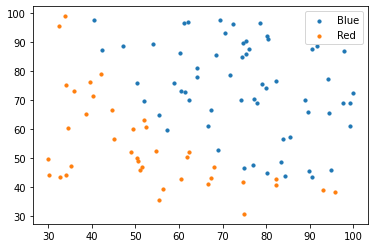

In [100]:
reds = df.loc[Y == 0] # Reds: 0
blues = df.loc[Y == 1] # Blues: 1
plt.scatter(blues.iloc[:, 0], blues.iloc[:, 1], s=10, label='Blue')
plt.scatter(reds.iloc[:, 0], reds.iloc[:, 1], s=10, label='Red')
plt.legend()
plt.show()

## Tách thành bộ Train và Test

In [101]:
trainX, testX = X[:80], X[80:]
trainY, testY = Y[:80], Y[80:]

## Chuẩn hóa dữ liệu

In [102]:
# Đưa về phân phối đơn vị
def normalize_data(train_x, test_x):
    train_mean = np.mean(train_x, axis=(0,1), dtype=np.float64, keepdims=True)
    train_std = np.std(train_x, axis=(0,1), dtype=np.float64, keepdims=True)
    
    train_x = (train_x-train_mean)/train_std
    test_x = (test_x-train_mean)/train_std
    return train_x, test_x

In [103]:
trainX, testX = normalize_data(trainX.values, testX.values)

## Xây dựng mô hình

In [104]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [105]:
sgd = SGD(0.0001)

In [106]:
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(2,)))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [107]:
model.compile(sgd, loss='binary_crossentropy')

In [108]:
model.fit(trainX, trainY, epochs=6000, verbose=1, validation_data=(testX, testY))

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
3/3 [==============================] - 0s 16ms/step - loss: 0.7754 - val_loss: 0.7711
Epoch 3502/6000
3/3 [==============================] - 0s 17ms/step - loss: 0.7753 - val_loss: 0.7711
Epoch 3503/6000
3/3 [==============================] - 0s 17ms/step - loss: 0.7752 - val_loss: 0.7710
Epoch 3504/6000
3/3 [==============================] - 0s 18ms/step - loss: 0.7752 - val_loss: 0.7710
Epoch 3505/6000
3/3 [==============================] - 0s 25ms/step - loss: 0.7751 - val_loss: 0.7709
Epoch 3506/6000
3/3 [==============================] - 0s 16ms/step - loss: 0.7751 - val_loss: 0.7708
Epoch 3507/6000
3/3 [==============================] - 0s 17ms/step - loss: 0.7750 - val_loss: 0.7708
Epoch 3508/6000
3/3 [==============================] - 0s 15ms/step - loss: 0.7750 - val_loss: 0.7707
Epoch 3509/6000
3/3 [==============================] - 0s 17ms/step - loss: 0.7749 - val_loss: 0.7706
Epoch 3510/6000
3/3 [====================

In [109]:
model.predict(testX) >= 0.5

array([[False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True]])

In [110]:
predicted_classes = tf.cast(model.predict(testX) >= 0.5, dtype=tf.int64)
acc = np.mean(predicted_classes == testY) * 100

In [111]:
acc

69.80609418282549